In [7]:
from qiskit import *
from numpy import *

In [8]:
Q= int(input(" Enter the number of qubits: "))
circuit = QuantumCircuit(Q,Q)
n=Q

#Creating GHZ Entalment
circuit.h(0)

for x in range(1,n):
    circuit.cx(0,x)

while(n!=0):
    circuit.h(n-1)
    for qubit in range(0,n-1):
        circuit.cp(pi/2**(n-qubit), qubit, n-1)
    n -= 1



circuit.draw()

┌───┐                                               ┌───┐
q_0: ┤ H ├──■────■────────■──────────────────────■───────┤ H ├
     └───┘┌─┴─┐  │        │                ┌───┐ │P(π/4) └───┘
q_1: ─────┤ X ├──┼────────┼────────■───────┤ H ├─■────────────
          └───┘┌─┴─┐┌───┐ │P(π/8)  │P(π/4) └───┘              
q_2: ──────────┤ X ├┤ H ├─■────────■──────────────────────────
               └───┘└───┘                                     
c: 3/═════════════════════════════════════════════════════════

In [9]:
for qubit in range(Q//2):
    circuit.swap(qubit, n-qubit-1)

circuit.draw()

┌───┐                                               ┌───┐   
q_0: ┤ H ├──■────■────────■──────────────────────■───────┤ H ├─X─
     └───┘┌─┴─┐  │        │                ┌───┐ │P(π/4) └───┘ │ 
q_1: ─────┤ X ├──┼────────┼────────■───────┤ H ├─■─────────────┼─
          └───┘┌─┴─┐┌───┐ │P(π/8)  │P(π/4) └───┘               │ 
q_2: ──────────┤ X ├┤ H ├─■────────■───────────────────────────X─
               └───┘└───┘                                        
c: 3/════════════════════════════════════════════════════════════

In [10]:
circuit.measure([0,1,2],[0,1,2])

circuit.draw()

┌───┐                                               ┌───┐   ┌─┐   
q_0: ┤ H ├──■────■────────■──────────────────────■───────┤ H ├─X─┤M├───
     └───┘┌─┴─┐  │        │                ┌───┐ │P(π/4) └┬─┬┘ │ └╥┘   
q_1: ─────┤ X ├──┼────────┼────────■───────┤ H ├─■────────┤M├──┼──╫────
          └───┘┌─┴─┐┌───┐ │P(π/8)  │P(π/4) └───┘          └╥┘  │  ║ ┌─┐
q_2: ──────────┤ X ├┤ H ├─■────────■───────────────────────╫───X──╫─┤M├
               └───┘└───┘                                  ║      ║ └╥┘
c: 3/══════════════════════════════════════════════════════╩══════╩══╩═
                                                           1      0  2

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'011': 98, '111': 166, '110': 223, '001': 66, '101': 182, '010': 22, '000': 267}


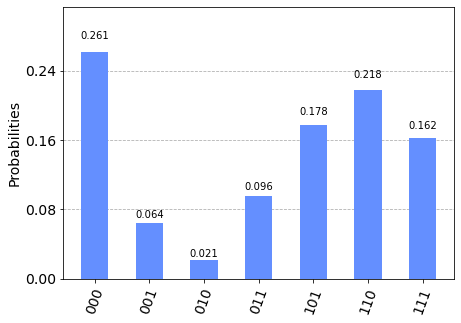

In [12]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)